In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('salary.csv')
df.head()

,Company,Job,Degree,Salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
input_variable=df.drop('Salary_more_than_100k',axis=1)
target_variable=df['Salary_more_than_100k']

In [4]:
input_variable

,Company,Job,Degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [5]:
target_variable

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: Salary_more_than_100k, dtype: int64

### convert labels into numericals

In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_Company=LabelEncoder()
label_job=LabelEncoder()
label_degree=LabelEncoder()

In [11]:
input_variable['company_1']=label_Company.fit_transform(input_variable['Company'])
input_variable['Job_1']=label_job.fit_transform(input_variable['Job'])
input_variable['degree_1']=label_degree.fit_transform(input_variable['Degree'])

In [12]:
input_variable

,Company,Job,Degree,company_1,Job_1,degree_1
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [15]:
input_final=input_variable.drop(['Company','Job','Degree'],axis=1)
input_final.head()

,company_1,Job_1,degree_1
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
model=DecisionTreeClassifier()

In [17]:
model.fit(input_final,target_variable)

DecisionTreeClassifier()

[Text(0.4166666666666667, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.25, 0.75, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5833333333333334, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5833333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.4166666666666667, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Tex

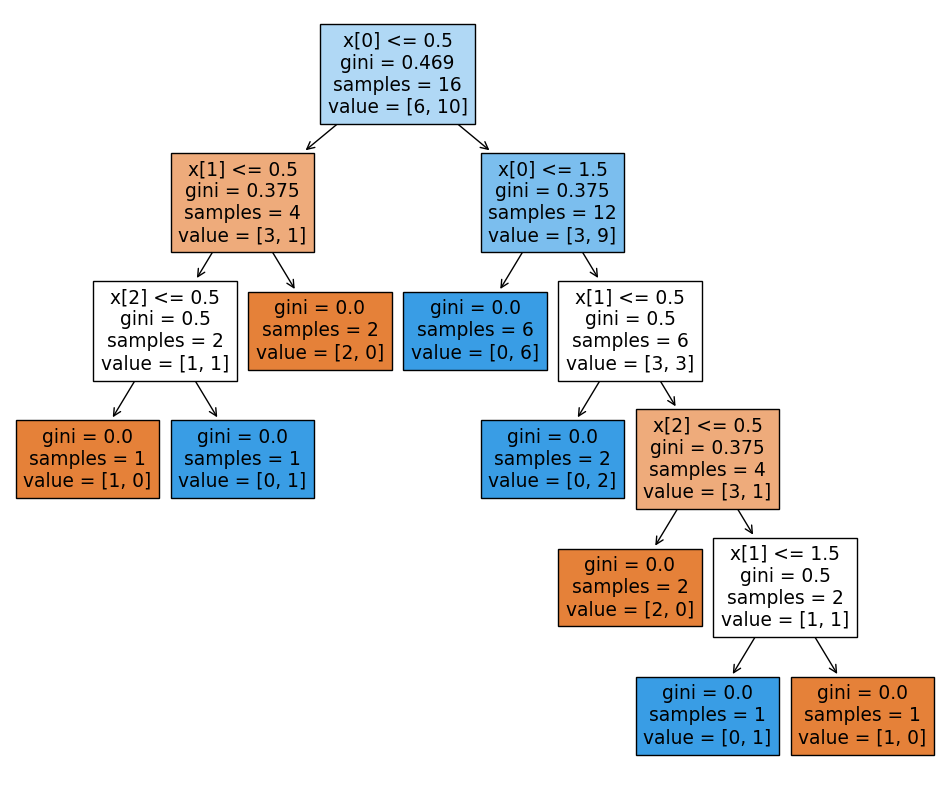

In [21]:
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)


In [23]:
model.score(input_final,target_variable)

1.0

In [25]:
model.predict([[1,2,1]])

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [26]:
df_test=pd.read_csv('salarytest.csv')
df_test

,Company,Job,Degree
0,google,computer programmer,bachelors
1,google,sales executive,masters
2,google,business manager,masters
3,facebook,business manager,bachelors
4,facebook,sales executive,masters
5,facebook,business manager,masters
6,abc pharma,sales executive,masters
7,abc pharma,business manager,masters
8,abc pharma,sales executive,bachelors


In [29]:
df_test['company_1']=label_Company.transform(df_test['Company'])

In [31]:
df_test['Job_1']=label_job.transform(df_test['Job'])
df_test['Degree_1']=label_degree.transform(df_test['Degree'])

In [32]:
df_test

,Company,Job,Degree,company_1,Job_1,Degree_1
0,google,computer programmer,bachelors,2,1,0
1,google,sales executive,masters,2,2,1
2,google,business manager,masters,2,0,1
3,facebook,business manager,bachelors,1,0,0
4,facebook,sales executive,masters,1,2,1
5,facebook,business manager,masters,1,0,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,business manager,masters,0,0,1
8,abc pharma,sales executive,bachelors,0,2,0


In [33]:
df_test_final=df_test.drop(['Company','Job','Degree'],axis=1)
df_test_final

,company_1,Job_1,Degree_1
0,2,1,0
1,2,2,1
2,2,0,1
3,1,0,0
4,1,2,1
5,1,0,1
6,0,2,1
7,0,0,1
8,0,2,0


In [40]:
df_test_final.rename(columns={"Job_1":"job_1","Degree_1":"degree_1"},inplace=True)

In [45]:
df_test_final.rename(columns={"job_1":"Job_1"},inplace=True)

In [46]:
df_test_final

,company_1,Job_1,degree_1
0,2,1,0
1,2,2,1
2,2,0,1
3,1,0,0
4,1,2,1
5,1,0,1
6,0,2,1
7,0,0,1
8,0,2,0


In [50]:
model.predict(df_test_final)

array([0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
a=model.predict(df_test_final)

In [49]:
model.score(df_test_final,a)

1.0

### Titanic Dataset

In [51]:
df=pd.read_csv('titanic.csv')

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [60]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [61]:
df_final=df[['Pclass','Sex','Age','Fare','Embarked']]
output_variable=df['Survived']

### Observations
### ***************
#### We choose Pclass,Sex,Age,Fare and Embarked features to train our model and left out Id since each of them were unique and Sisb and Parch features where only showing their relaionship and wheather travelled alone or not that doesn't make sense

In [62]:
df_final.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [65]:
df_final['Sex'].replace({'male':0,'female':1},inplace=True)
label1=LabelEncoder()
df_final['Embarked_1']=label1.fit_transform(df['Embarked'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_18820\3950083766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Sex'].replace({'male':0,'female':1},inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_18820\3950083766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Embarked_1']=label1.fit_transform(df['Embarked'])


In [66]:
df_final.head()

,Pclass,Sex,Age,Fare,Embarked,Embarked_1
0,3,0,22.0,7.2500,S,2
1,1,1,38.0,71.2833,C,0
2,3,1,26.0,7.9250,S,2
3,1,1,35.0,53.1000,S,2
4,3,0,35.0,8.0500,S,2


In [70]:
df_final.drop('Embarked',inplace=True,axis=1)

C:\Users\aksha\AppData\Local\Temp\ipykernel_18820\1386245260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('Embarked',inplace=True,axis=1)


In [71]:
df_final

,Pclass,Sex,Age,Fare,Embarked_1
0,3,0,22.0,7.2500,2
1,1,1,38.0,71.2833,0
2,3,1,26.0,7.9250,2
3,1,1,35.0,53.1000,2
4,3,0,35.0,8.0500,2
...,...,...,...,...,...
886,2,0,27.0,13.0000,2
887,1,1,19.0,30.0000,2
888,3,1,NaN,23.4500,2
889,1,0,26.0,30.0000,0


#### handline missing values

In [79]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked_1  891 non-null    int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 31.4 KB


In [80]:
output_variable.isnull().sum()

0

In [81]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<Axes: ylabel='Age'>

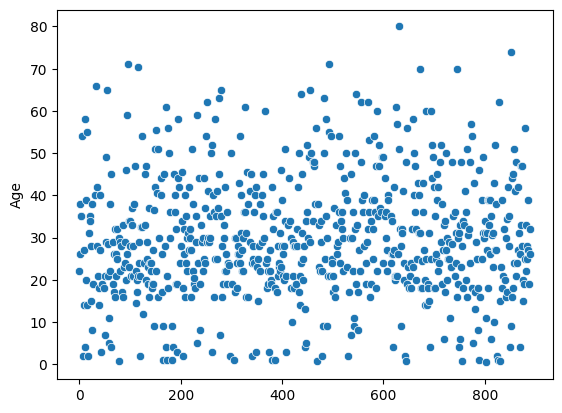

In [84]:
sns.scatterplot(df_final['Age'])

#### We have missing values in Age since the spread is wide we use average to fill the missing values in Age feature

In [93]:
m=df_final['Age'].mean()
df_final['Age'].fillna(m,inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_18820\1630557914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Age'].fillna(m,inplace=True)


In [94]:
df_final['Age'].isnull().sum()

0

<Axes: >

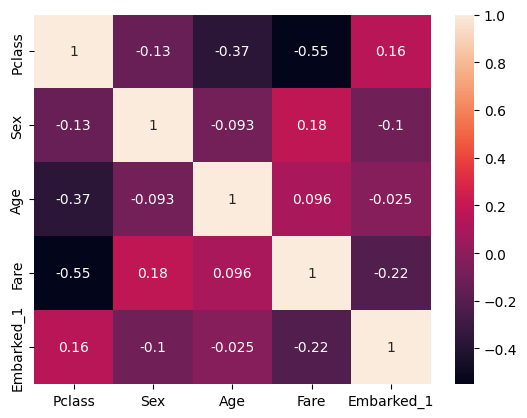

In [72]:
sns.heatmap(df_final.corr(),annot=True)

In [74]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(df_final,output_variable,test_size=0.3,random_state=0)

In [96]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked_1
857,1,0,51.000000,26.5500,2
52,1,1,49.000000,76.7292,0
386,3,0,1.000000,46.9000,2
124,1,0,54.000000,77.2875,2
578,3,1,29.699118,14.4583,0


In [97]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked_1    0
dtype: int64

In [98]:
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
model1.score(X_test,y_test)

0.7723880597014925

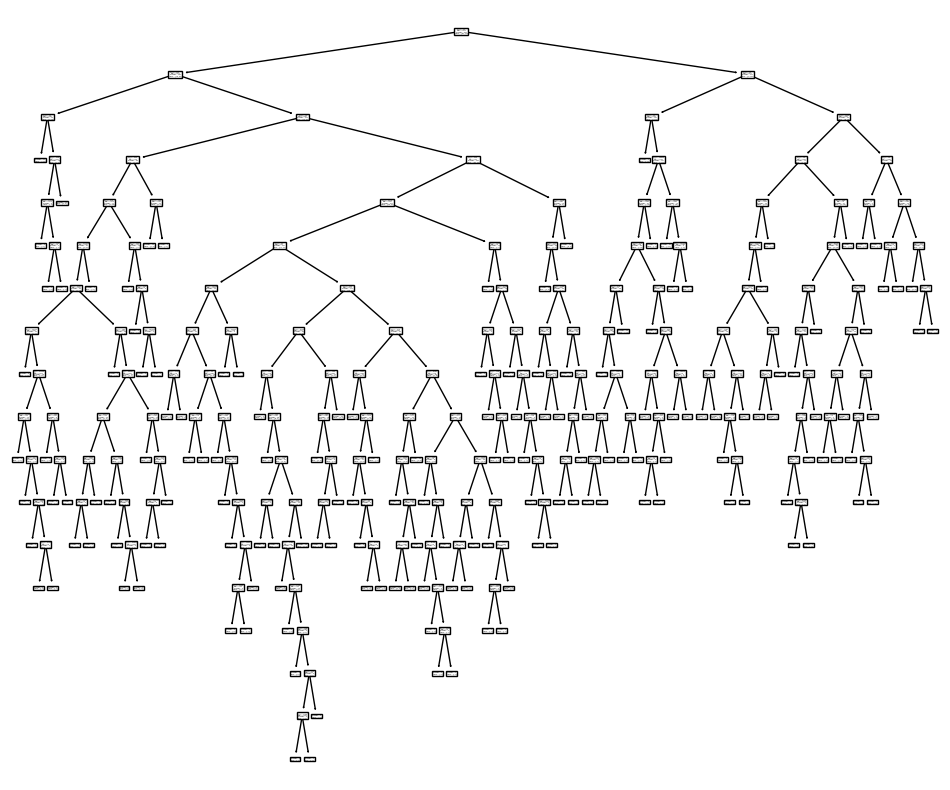

In [101]:
plt.figure(figsize=(12,10))
tree.plot_tree(model1)
plt.show()

In [102]:
df_final1=df_final.drop('Embarked_1',axis=1)

In [103]:
df_final1.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [104]:
X_train1,X_test1,y_train1,y_test1=train_test_split(df_final1,output_variable,test_size=0.3,random_state=0)

In [106]:
model2=DecisionTreeClassifier()
model2.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [107]:
model2.score(X_test1,y_test1)

0.8171641791044776

In [110]:
a=model2.predict([[2,1,80,100]])
'Dead' if a==0 else 'Alive'

E:\BROCAMP\DS\dsvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Alive'